# **REDES NEURONALES**

**Objetivo general**
Desarrollar modelos de clasificación para predecir el riesgo de incumplimiento en créditos de
vehículos, analizando el perfil de los clientes, ajustando diferentes algoritmos de clasificación y
evaluando el desempeño de los modelos bajo condiciones de desbalance de clases.

## **Carga y preprocesamiento de los datos**

### **Librerias**

In [ ]:
# Instalación de todas las librerías necesarias
import sys
import subprocess

def install_package(pip_name, import_name=None):
    """Instala un paquete si no está disponible"""
    if import_name is None:
        import_name = pip_name
    
    try:
        __import__(import_name)
        print(f"✓ {pip_name} ya está instalado")
    except ImportError:
        print(f"Instalando {pip_name}...")
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", pip_name, "--quiet"])
            print(f"✓ {pip_name} instalado correctamente")
        except Exception as e:
            print(f"⚠ Error al instalar {pip_name}: {e}")

# Lista de paquetes: (nombre_pip, nombre_import)
packages = [
    ("pandas", "pandas"),
    ("numpy", "numpy"),
    ("matplotlib", "matplotlib"),
    ("seaborn", "seaborn"),
    ("scikit-learn", "sklearn"),
    ("xgboost", "xgboost"),
    ("imbalanced-learn", "imblearn"),
    ("tensorflow", "tensorflow"),
    ("openpyxl", "openpyxl")  # Necesario para leer archivos Excel
]

print("Verificando e instalando librerías necesarias...\n")
# Instalar paquetes que no estén disponibles
for pip_name, import_name in packages:
    install_package(pip_name, import_name)

print("\n✓ Todas las librerías están listas para usar")


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    roc_auc_score, 
    roc_curve,
    ConfusionMatrixDisplay, 
    precision_score, 
    precision_recall_curve, 
    recall_score, 
    accuracy_score, 
    f1_score
)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import optimizers
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf





ModuleNotFoundError: No module named 'pandas'

In [ ]:
# Instalación de imbalanced-learn (si no está instalado)
try:
    import imblearn
    print("✓ imbalanced-learn ya está instalado")
except ImportError:
    import sys
    import subprocess
    print("Instalando imbalanced-learn...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "imbalanced-learn", "--quiet"])
    print("✓ imbalanced-learn instalado correctamente")

### **Cargar base de datos**

In [ ]:
# Enlace
sheet_id = "1l0_sGB2vt9ufBqiS3_5gPTf8CCj3BQuD"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=xlsx"

# Leer el archivo
df = pd.read_excel(url)

# Verificar las primeras filas
df.head()

,Caso,Perfil,Estado,Edad,Genero,ScoreCrediticio,PorcentajeFinanciacion,Plazo,IngresoEstimado,Gastos,CapacidadDePago,ValorCuotaMensual,M3_30AC
0,1004991730,ASALARIADO,NUEVO,30,FEMENINO,748,0.6850,72,3289800.0,2430508.51,0.361093,2379693,0
1,1005097331,INDEPENDIENTE,NUEVO,46,MASCULINO,670,0.2783,60,2425440.0,1621788.08,0.948770,847046,0
2,1005120587,INDEPENDIENTE,USADO,39,MASCULINO,752,1.0000,60,30000000.0,3614018.63,12.009213,2197145,0
3,1005152562,ASALARIADO,USADO,38,FEMENINO,758,1.0000,84,1631331.0,1725244.99,-0.068706,1366896,0
4,1005153782,INDEPENDIENTE,NUEVO,60,FEMENINO,846,0.6596,72,20907400.0,3439341.88,13.004595,1343222,0


## **Analisis exploratorio de datos (EDA)**

Se realiza una exploraciòn inicial del dataframe `df`, para entender su composiciòn. Posteriormente se realiza un analisis de atos faltantes y un analisis estadistico.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21091 entries, 0 to 21090
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Caso                    21091 non-null  int64  
 1   Perfil                  21091 non-null  object 
 2   Estado                  21091 non-null  object 
 3   Edad                    21091 non-null  int64  
 4   Genero                  21091 non-null  object 
 5   ScoreCrediticio         21091 non-null  int64  
 6   PorcentajeFinanciacion  21091 non-null  float64
 7   Plazo                   21091 non-null  int64  
 8   IngresoEstimado         21063 non-null  float64
 9   Gastos                  21091 non-null  float64
 10  CapacidadDePago         21063 non-null  float64
 11  ValorCuotaMensual       21091 non-null  int64  
 12  M3_30AC                 21091 non-null  int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 2.1+ MB


### **Analisis de datos faltantes**

Se explora el dataframe `df`

In [ ]:
print('Valores faltantes por columna:')
print(df.isnull().sum())

Valores faltantes por columna:
Caso                       0
Perfil                     0
Estado                     0
Edad                       0
Genero                     0
ScoreCrediticio            0
PorcentajeFinanciacion     0
Plazo                      0
IngresoEstimado           28
Gastos                     0
CapacidadDePago           28
ValorCuotaMensual          0
M3_30AC                    0
dtype: int64


En total, hay 837 datos en la variable objetivo de clase 1 y 20.254 de clase 2. Por lo que se observa un desbalance de clases.

In [ ]:
print(df['M3_30AC'].value_counts()[1])
print(df['M3_30AC'].value_counts()[0])

837
20254


Existen datos faltantes en las columnas `IngresoEstimado` y `CapacidadDePago`, por tal motivo se realizarà una exploraciòn para identificar si existe una relaciòn entre los nulos de ambas columnas y a que clase pertenecen (clase 0, clase 1) en la columna `M3_30AC`.

In [ ]:
nulos = df[df['IngresoEstimado'].isnull() | df['CapacidadDePago'].isnull()]
clase_1 = nulos['M3_30AC'].value_counts()[1]
clse_0 = nulos['M3_30AC'].value_counts()[0]
porcentaje_nulos = len(nulos) / len(df) * 100

print(f'Cantidad de nulos comunes en IngresoEstimado y CapacidadDePago: {len(nulos)}')
print(f'clase 1: {clase_1}')
print(f'clase 0: {clse_0}')
print(f'Porcentaje de nulos: {porcentaje_nulos}%')

nulos


Cantidad de nulos comunes en IngresoEstimado y CapacidadDePago: 28
clase 1: 2
clase 0: 26
Porcentaje de nulos: 0.1327580484566877%


,Caso,Perfil,Estado,Edad,Genero,ScoreCrediticio,PorcentajeFinanciacion,Plazo,IngresoEstimado,Gastos,CapacidadDePago,ValorCuotaMensual,M3_30AC
171,1005559324,ASALARIADO,NUEVO,33,FEMENINO,786,0.9462,72,NaN,2922560.51,NaN,2543855,0
172,1005559428,ASALARIADO,USADO,24,MASCULINO,661,0.6952,60,NaN,978549.94,NaN,714177,0
176,1005562797,ASALARIADO,USADO,58,MASCULINO,627,0.5953,60,NaN,408703.54,NaN,720500,0
185,1005566972,INDEPENDIENTE,USADO,56,FEMENINO,726,0.8260,72,NaN,737205.70,NaN,854895,0
1401,1005702344,INDEPENDIENTE,NUEVO,36,MASCULINO,709,0.5866,60,NaN,675736.24,NaN,1798187,0
3081,1005796918,ASALARIADO,NUEVO,44,FEMENINO,852,0.6416,60,NaN,706753.87,NaN,1492922,0
3356,1005813404,ASALARIADO,USADO,25,FEMENINO,821,1.0428,72,NaN,996634.69,NaN,1057764,1
4680,1005881567,ASALARIADO,NUEVO,45,MASCULINO,772,0.4524,60,NaN,7028300.17,NaN,2693258,0
4682,1005881614,ASALARIADO,NUEVO,33,MASCULINO,674,1.0000,60,NaN,2133988.87,NaN,1949538,0
5639,1005930157,INDEPENDIENTE,NUEVO,45,FEMENINO,777,1.0000,60,NaN,4269207.95,NaN,3336841,0


Como el porcentaje de nulos es bajo, solo el 0,13% y la mayoria (26) pertenecen a la clase 0, se decide eliminar los casos nulos.

In [ ]:
df = df[df['IngresoEstimado'].notnull() | df['CapacidadDePago'].notnull()]
print(f'Cantidad de casos sin datos nulos en el nuevo dataframe df: {len(df)} ')

Cantidad de casos sin datos nulos en el nuevo dataframe df: 21063 


### **Analisis estadistico**

Se explora el comportamiento de las variables independientes y su relaciòn con la variable dependiente M3_30AC

In [ ]:
# Estadísticas generales de variables numéricas
df.describe()

,Caso,Edad,ScoreCrediticio,PorcentajeFinanciacion,Plazo,IngresoEstimado,Gastos,CapacidadDePago,ValorCuotaMensual,M3_30AC
count,2.106300e+04,21063.000000,21063.000000,21063.000000,21063.000000,2.106300e+04,2.106300e+04,2.106300e+04,2.106300e+04,21063.000000
mean,1.006178e+09,44.542563,782.361724,0.743488,60.633101,5.018901e+06,1.142708e+08,-8.077237e+01,1.703993e+06,0.039643
std,3.264530e+05,12.744980,85.314167,0.246626,12.497081,5.955286e+06,1.624658e+10,1.198892e+04,8.595862e+05,0.195124
min,1.004992e+09,19.000000,343.000000,0.100000,12.000000,0.000000e+00,3.685310e+05,-1.739961e+06,1.500000e+05,0.000000
25%,1.005912e+09,34.000000,726.000000,0.552200,60.000000,1.596674e+06,1.090736e+06,2.454135e-01,1.158779e+06,0.000000
50%,1.006159e+09,43.000000,783.000000,0.800000,60.000000,2.985320e+06,1.673100e+06,9.132229e-01,1.556922e+06,0.000000
75%,1.006453e+09,54.000000,838.000000,1.000000,72.000000,5.797367e+06,2.736294e+06,2.150520e+00,2.061886e+06,0.000000
max,1.006786e+09,75.000000,999.000000,1.067000,84.000000,3.480000e+07,2.357884e+12,1.207657e+02,1.861680e+07,1.000000


In [ ]:
# Configuración básica de estilo
sns.set(style="whitegrid", palette="pastel")

In [ ]:
numeric_vars = ["Edad", "ScoreCrediticio", "IngresoEstimado", "Gastos",
                "CapacidadDePago", "ValorCuotaMensual", "Plazo"]
                #Variables a analizar

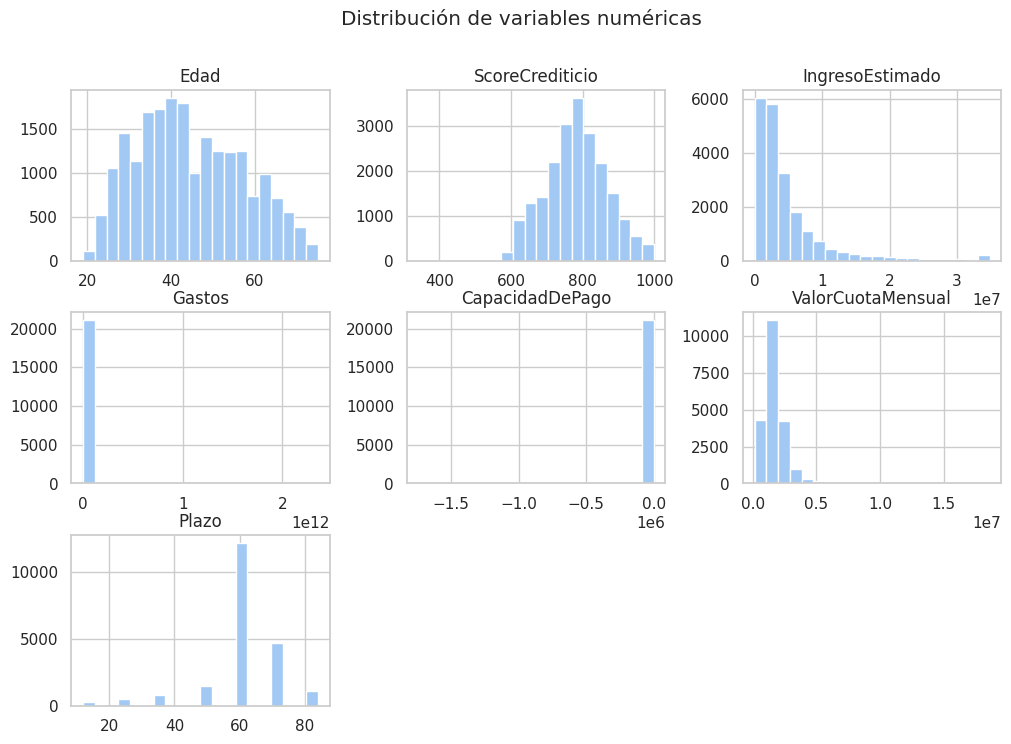

In [ ]:
df[numeric_vars].hist(bins=20, figsize=(12,8))
plt.suptitle("Distribución de variables numéricas")
plt.show()

Al analizar los histograma de las variables númericas encontramos que:
1.   La edad está centrada entre 35 y 40 años, la mayoría de los clientes se encuentran en una etapa laboral estable, con menor proporción de personas jóvenes (<25) o mayores (>65).
2.   El score crediticio está entre 700 y 850, la mayoría de los solicitantes tienen un buen historial crediticio, lo que podría implicar un bajo nivel de incumplimiento en general.
3.   En cuanto al ingreso estimado, se observa que la mayoría de las personas ganan cantidades moderadas y solo unas pocas tienen ingresos muy altos.
4.   La mayoría de clientes concentran sus gastos en un rango bajo o medio, con pocos casos de gastos excesivamente altos.
5.   En la capacidad de pago, parece que la mayoría de valores están concentrados en torno a cero o negativos, con pocos valores dispersos hacia la derecha.
6.   El histograma del valor de la cuota mensual está sesgado a la derecha, lo que indica que la mayoría de los créditos tienen cuotas bajas o moderadas, mientras que pocos casos presentan cuotas muy altas.

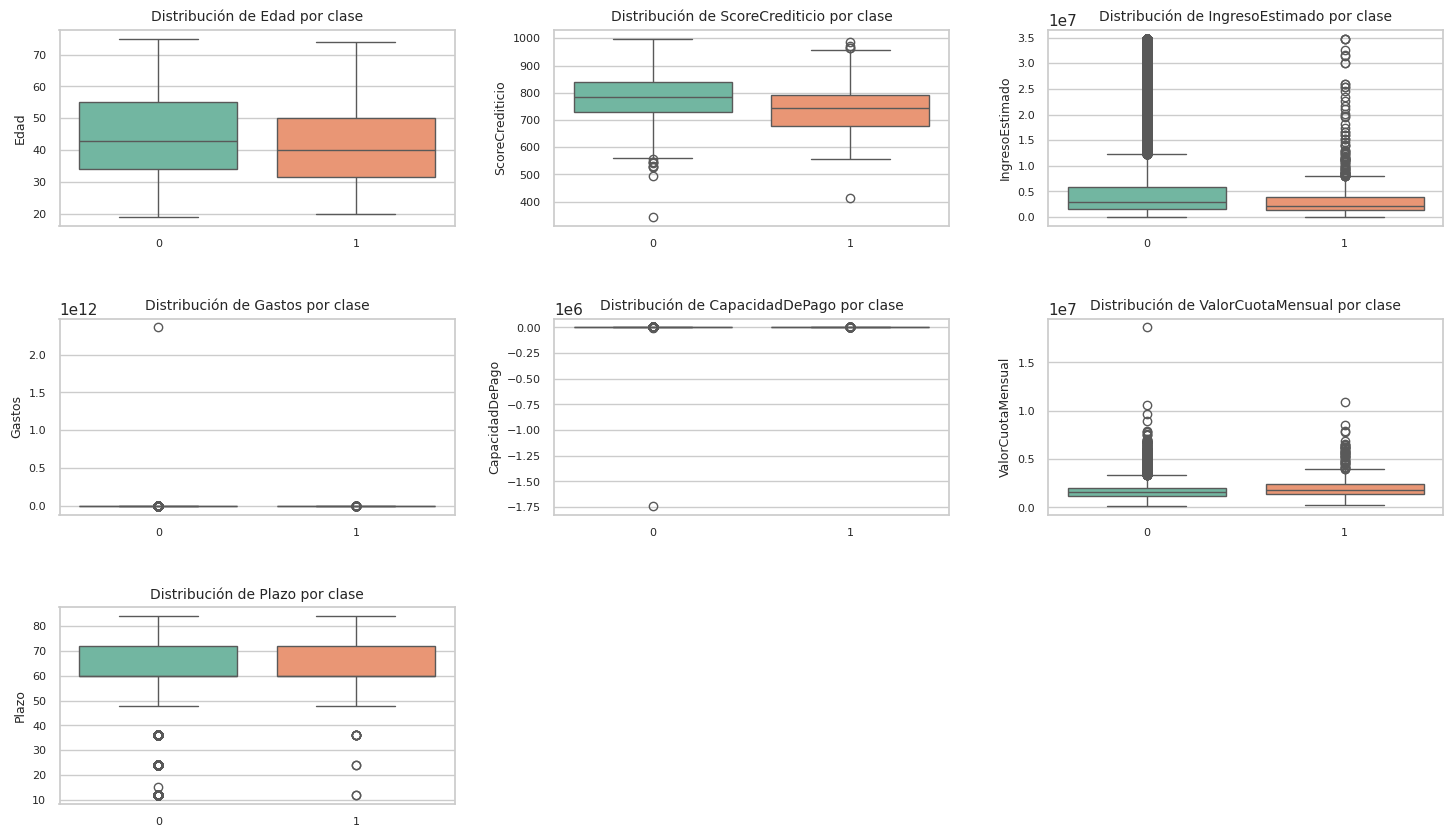

In [ ]:
variables = numeric_vars

# Configurar número de filas y columnas
n_cols = 3
n_rows = (len(variables) + n_cols - 1) // n_cols

# Ajustar tamaño total de la figura
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))
axs = axs.flatten()

# Crear un boxplot por variable
for i, var in enumerate(variables):
    sns.boxplot(data=df, x='M3_30AC', y=var, hue='M3_30AC',
                ax=axs[i], palette='Set2', legend=False)
    axs[i].set_title(f'Distribución de {var} por clase', fontsize=10)
    axs[i].set_xlabel('')
    axs[i].set_ylabel(var, fontsize=9)
    axs[i].tick_params(axis='x', labelsize=8)
    axs[i].tick_params(axis='y', labelsize=8)

# Eliminar subplots vacíos
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Ajustar espaciado
plt.tight_layout(pad=2)
plt.show()

Al analizar los boxplots tenemos que:

1.   **Edad:** Las medianas de ambas clases son bastante similares (aprox. 40–45 años). La dispersión es muy parecida. Se podría decir que la edad no parece ser un factor diferenciador fuerte del incumplimiento (variable no muy relevante).
2.   **Score crediticio:** diferencia bastante entre clientes riesgosos y no riesgosos (variable relevante).
3.   **Ingreso estimado:** los clientes en default (1) tienden a tener ingresos levemente más bajos. Sin embargo, hay muchos outliers altos en ambos grupos.

En si, hay cierta tendencia: quien incumple suele ganar menos, pero no es una diferencia muy fuerte debido a la cantidad de valores extremos.

4.   **Gastos:** se observan outliers gigantes (probablemente errores). No se aprecia diferencia clara entre 0 y 1 (limpiarlos o revisar outliers).
5.   **Capacidad de pago:** Parece que muchos valores están cerca de cero o negativos. Además, hay un outlier extremadamente negativo.
6.   **Valor cuota mensual:** Para la clase 1 (default) parece haber cuotas mensuales ligeramente más altas. Pero hay muchos outliers fuertes (muy grandes).



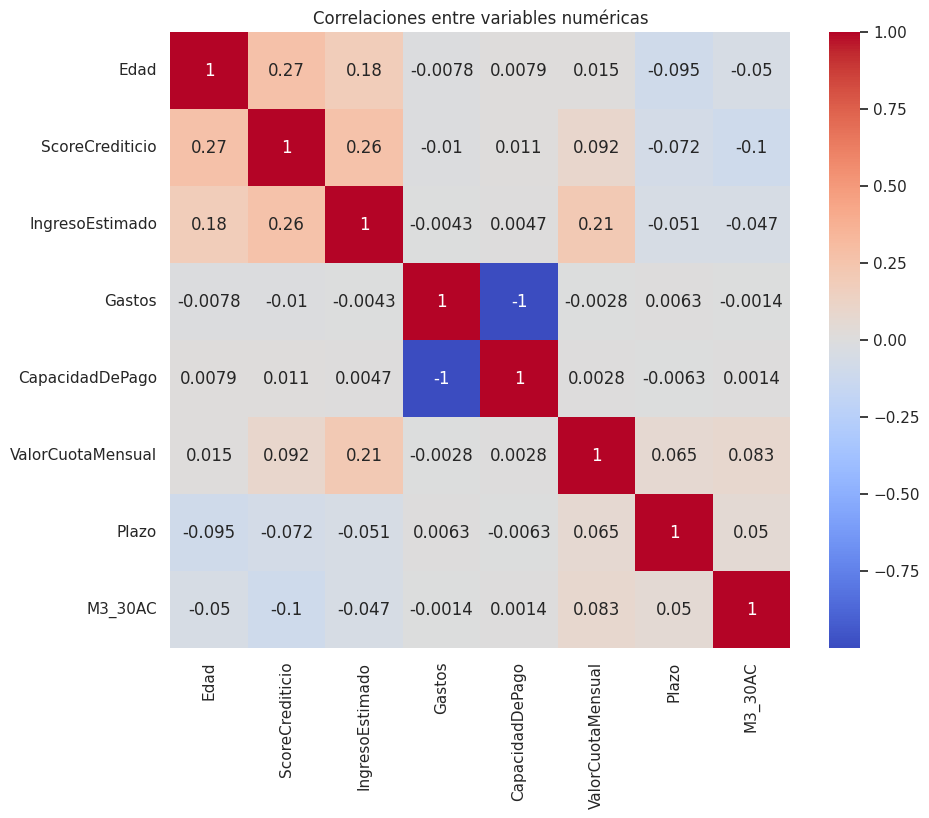

In [ ]:
#Matriz de correlación
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_vars + ["M3_30AC"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlaciones entre variables numéricas")
plt.show()

La matriz de correlación muestra que no existen relaciones lineales fuertes entre las variables numéricas y el evento de incumplimiento (M3_30AC). Las correlaciones más altas con la variable objetivo son ScoreCrediticio (–0.10) y ValorCuotaMensual (+0.083), aunque siguen siendo bajas. Esto es consistente con problemas de riesgo crediticio, donde las relaciones entre variables suelen ser no lineales; por ello, métodos como redes neuronales resultan adecuados.

También se observa una correlación perfecta (–1.00) entre Gastos y CapacidadDePago, lo cual sugiere que esta variable fue calculada como Ingreso – Gastos, por lo que no aporta información adicional. Se recomienda revisar o transformar esta variable.

##**Tratamiento de clases desbalanceadas**

Se analiza la distribuciòn de la variable `M3_30AC`, para determinar si existe algun desbalance de clases.

In [ ]:
total_clase_0 = df['M3_30AC'].value_counts()[0]
total_clase_1 = df['M3_30AC'].value_counts()[1]
porcentaje_clase_0 = total_clase_0 / len(df) * 100
porcentaje_clase_1 = total_clase_1 / len(df) * 100

print(f'Total datos clase 0: {total_clase_0}')
print(f'Total datos clase 1: {total_clase_1}')
print(f'Porcentaje datos clase 0: {porcentaje_clase_0}%')
print(f'Porcentaje datos clase 1: {porcentaje_clase_1}%')

Total datos clase 0: 20228
Total datos clase 1: 835
Porcentaje datos clase 0: 96.03570241655984%
Porcentaje datos clase 1: 3.964297583440156%


Se concluye que hay desbalance de clase dado que se cuentan con 20.228 para la clase 0 y 835 para la clase 1. Se procede a estandarizar y hacer SMOTE (Oversampling) y Undersampling para balancear las clases.

### **Tecnics de balanceo.**

Se implementan dos estrategias, las cuales son:


*   Undersampling
*   Oversampling



#### **Undersampling**

Consiste en hacer un muestreo aleatorio sin remplazo en la clase mayoritaria. Cada caso solo puede ser tomado una vez.

In [ ]:
# Undersampling

# Separar las clases
df_majority = df[df['M3_30AC'] == 0]
df_minority = df[df['M3_30AC'] == 1]

# Realizar undersampling de la clase mayoritaria
df_majority_undersampled = df_majority.sample(n=len(df_minority), random_state=42, replace=False)

# Concatenar las clases para formar el DataFrame balanceado
df_balanceado_under = pd.concat([df_majority_undersampled, df_minority])

# Verificar el balance del nuevo DataFrame
print(f"Tamaño del DataFrame original: {len(df)}")
print(f"Tamaño del DataFrame balanceado: {len(df_balanceado_under)}")
print("Conteo de clases en M3_30AC del DataFrame balanceado:")
print(df_balanceado_under['M3_30AC'].value_counts())

Tamaño del DataFrame original: 21063
Tamaño del DataFrame balanceado: 1670
Conteo de clases en M3_30AC del DataFrame balanceado:
M3_30AC
0    835
1    835
Name: count, dtype: int64


#### **Oversampling**

Consiste en crear datos sinteticos de la clase minoritaria. Los nuevos datos conservan las caracteristicas de los casos reales.

In [ ]:
# Separar características y variable objetivo
X = df.drop("M3_30AC", axis=1)
y = df["M3_30AC"]

# Drop 'Caso' as it's an identifier and not a feature
X = X.drop("Caso", axis=1)

# Identificar columnas categóricas
categorical_cols = X.select_dtypes(include='object').columns

# Aplicar One-Hot Encoding a las variables categóricas en X
# Use drop_first=True to avoid multicollinearity
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Aplicar SMOTE a los datos codificados
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

# Crear nuevo DataFrame balanceado con las columnas correctas
df_balanceado_over = pd.DataFrame(X_resampled, columns=X_encoded.columns)
df_balanceado_over["M3_30AC"] = y_resampled

# Verificar el balance del nuevo DataFrame
print(f"Tamaño del DataFrame original (antes de SMOTE): {len(df)}")
print(f"Tamaño del DataFrame balanceado (después de SMOTE): {len(df_balanceado_over)}")
print("Conteo de clases en M3_30AC del DataFrame balanceado (después de SMOTE):")
print(df_balanceado_over['M3_30AC'].value_counts())

Tamaño del DataFrame original (antes de SMOTE): 21063
Tamaño del DataFrame balanceado (después de SMOTE): 40456
Conteo de clases en M3_30AC del DataFrame balanceado (después de SMOTE):
M3_30AC
0    20228
1    20228
Name: count, dtype: int64


##**Preprocesamiento de datos**

Se estandarizan las variables numericas

In [ ]:
# Estandarización oversampling
scaler = StandardScaler()
df_scaled_over = df_balanceado_over.copy()
df_scaled_over[numeric_vars] = scaler.fit_transform(df_scaled_over[numeric_vars])

# Estandarización undersampling
scaler = StandardScaler()
df_scaled_under = df_balanceado_under.copy()
df_scaled_under[numeric_vars] = scaler.fit_transform(df_scaled_under[numeric_vars])


Las columnas categoricas `['Perfil', 'Estado', 'Genero']` se conviertene  en binarias y se elimina la variable `'Caso'`

In [ ]:
# DATOS UNDERSAMPLING
df_processed_under = df_scaled_under.drop("Caso", axis=1) #se elimina la variable Caso ya que no aporta nada al modelo

# One-hot encode categorical columns
categorical_cols = ['Perfil', 'Estado', 'Genero']
df_processed_under = pd.get_dummies(df_processed_under, columns=categorical_cols, drop_first=True)

df_processed_over=df_scaled_over
display(print(f' Dimensiones de df_processed_over: {len(df_processed_over)}'))
display(df_processed_over.head())
display(print(f' Dimensiones de df_processed_under: {len(df_processed_under)}'))
display(df_processed_under.head())

 Dimensiones de df_processed_over: 40456


None

,Edad,ScoreCrediticio,PorcentajeFinanciacion,Plazo,IngresoEstimado,Gastos,CapacidadDePago,ValorCuotaMensual,Perfil_INDEPENDIENTE,Estado_USADO,Genero_MASCULINO,M3_30AC
0,-1.068518,-0.159246,0.6850,0.952920,-0.194473,-0.004956,0.004861,0.526908,False,False,False,0
1,0.276563,-1.128577,0.2783,-0.189785,-0.353801,-0.005025,0.004929,-1.037074,True,False,True,0
2,-0.311910,-0.109537,1.0000,-0.189785,4.729056,-0.004855,0.006208,0.340628,True,True,True,0
3,-0.395977,-0.034973,1.0000,2.095624,-0.500181,-0.005016,0.004812,-0.506596,False,True,False,0
4,1.453509,1.058631,0.6596,0.952920,3.053004,-0.004870,0.006323,-0.530754,True,False,False,0


 Dimensiones de df_processed_under: 1670


None

,Edad,ScoreCrediticio,PorcentajeFinanciacion,Plazo,IngresoEstimado,Gastos,CapacidadDePago,ValorCuotaMensual,M3_30AC,Perfil_INDEPENDIENTE,Estado_USADO,Genero_MASCULINO
16117,1.574704,2.176855,0.5185,-0.202500,3.303131,0.386396,5.452728,-1.114429,0,False,False,False
12739,0.942076,1.067221,0.2778,-2.391925,-0.437803,-0.744648,0.197554,-1.303413,0,False,True,True
14427,0.072212,0.693450,0.5394,-0.202500,-0.181926,-0.705830,-0.007215,0.069392,0,False,False,True
2141,-0.244102,0.378080,1.0339,1.986925,1.019627,2.036380,0.016130,0.357518,0,False,False,False
17455,0.862997,1.184025,0.3363,-1.297212,-0.255768,-0.556443,0.428230,-1.302223,0,False,False,False


##**Modelado de Redes Neuronales Artificiales Feedforward**

### **Ajuste preliminar (baseline MLP)**

####**Red neuronal (Oversampling)**

Se utilizan los datos balanceados producto del oversampling para generar un modelo inicial y observar el comportamiento de la función de perdida y metricas de desempeño.

In [ ]:
X_over = df_processed_over.drop("M3_30AC", axis=1)
y_over = df_processed_over["M3_30AC"]

X_train, X_test, y_train, y_test = train_test_split(
    X_over, y_over,
    test_size=0.2,
    random_state=42,
    stratify=y_over
)

Arquitectura de la red neuronal:


In [ ]:
# Red neuronal
baseline_model = keras.Sequential([
    layers.Dense(10, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compilación
baseline_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# Entrenamiento
history = baseline_model.fit(
    X_train, y_train,
    epochs=60,
    batch_size=16,
    validation_split=0.2,
    verbose=0
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


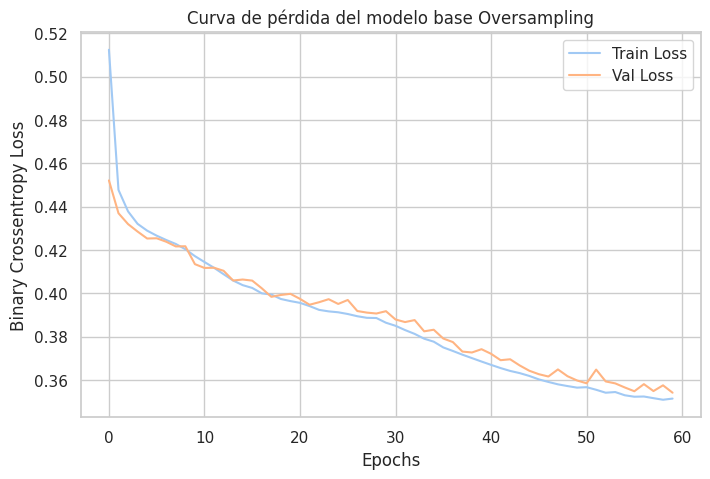

1012/1012 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
ANN (MODELO BASE)(train):
              precision    recall  f1-score   support

           0       0.84      0.84      0.84     16182
           1       0.84      0.84      0.84     16182

    accuracy                           0.84     32364
   macro avg       0.84      0.84      0.84     32364
weighted avg       0.84      0.84      0.84     32364

253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ANN (MODELO BASE) (test) :
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      4046
           1       0.84      0.83      0.84      4046

    accuracy                           0.84      8092
   macro avg       0.84      0.84      0.84      8092
weighted avg       0.84      0.84      0.84      8092



In [ ]:
#Curva de pérdida de Baseline MLP


plt.figure(figsize=(8,5))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Curva de pérdida del modelo base Oversampling")
plt.xlabel("Epochs")
plt.ylabel("Binary Crossentropy Loss")
plt.legend()
plt.show()


# METRICAS DE DESEMPEÑO
# Evaluación train
y_pred_train = (baseline_model.predict(X_train) > 0.5).astype("int32")
print("ANN (MODELO BASE)(train):")
print(classification_report(y_train, y_pred_train))

# Evaluación test
y_pred_test = (baseline_model.predict(X_test) > 0.5).astype("int32")
print("ANN (MODELO BASE) (test) :")
print(classification_report(y_test, y_pred_test))

###**Red neuronal (Undersampling)**

In [ ]:
X_under = df_processed_under.drop("M3_30AC", axis=1)
y_under = df_processed_under["M3_30AC"]

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(
    X_under, y_under,
    test_size=0.2,
    random_state=42,
    stratify=y_under
)

In [ ]:
# Red neuronal
baseline_model_under = keras.Sequential([
    layers.Dense(10, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compilación
baseline_model_under.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# Entrenamiento
history_under = baseline_model_under.fit(
    X_train_under, y_train_under,
    epochs=60,
    batch_size=16,
    validation_split=0.2,
    verbose=0
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


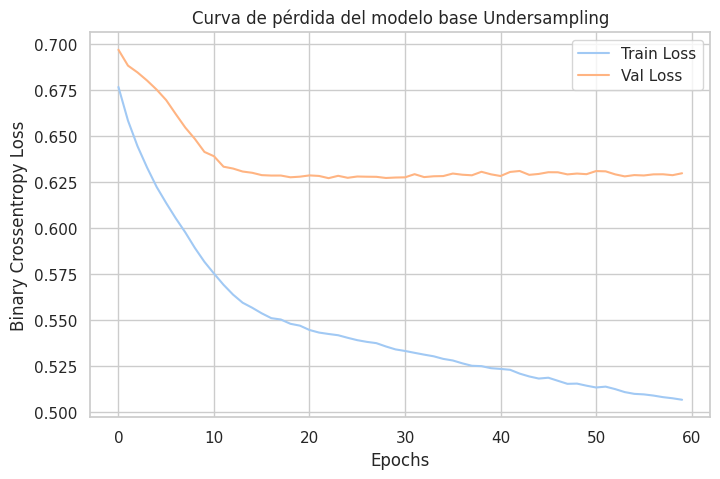

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
ANN (MODELO BASE)(train):
              precision    recall  f1-score   support

           0       0.75      0.68      0.72       668
           1       0.71      0.78      0.74       668

    accuracy                           0.73      1336
   macro avg       0.73      0.73      0.73      1336
weighted avg       0.73      0.73      0.73      1336

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
ANN (MODELO BASE) (test) :
              precision    recall  f1-score   support

           0       0.70      0.68      0.69       167
           1       0.69      0.71      0.70       167

    accuracy                           0.69       334
   macro avg       0.69      0.69      0.69       334
weighted avg       0.69      0.69      0.69       334



In [ ]:
#Curva de pérdida de Baseline MLP

plt.figure(figsize=(8,5))
plt.plot(history_under.history["loss"], label="Train Loss")
plt.plot(history_under.history["val_loss"], label="Val Loss")
plt.title("Curva de pérdida del modelo base Undersampling")
plt.xlabel("Epochs")
plt.ylabel("Binary Crossentropy Loss")
plt.legend()
plt.show()


# METRICAS DE DESEMPEÑO
# Evaluación train
y_pred_train_under = (baseline_model_under.predict(X_train_under) > 0.5).astype("int32")
print("ANN (MODELO BASE)(train):")
print(classification_report(y_train_under, y_pred_train_under))

# Evaluación test
y_pred_test_under = (baseline_model_under.predict(X_test_under) > 0.5).astype("int32")
print("ANN (MODELO BASE) (test) :")
print(classification_report(y_test_under, y_pred_test_under))

###**Optimización de hiperparámetros**

Se realiza una busqueda de 10 modelos de manera aleatroria utilizando los datos obtenidos del oversampling, ya que con una mayor cantidad de datos, el modelo entiende mejor el comportamiento de la variable dependiente con respecto a las independientes.


Modelo 1 -> Units: 16, Hidden: 3, Activation: tanh, LR: 0.0001, Opt: RMSprop, Batch: 64
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy train: 0.760, test: 0.765
Recall train: 0.831, test: 0.837
Precision train: 0.728, test: 0.732


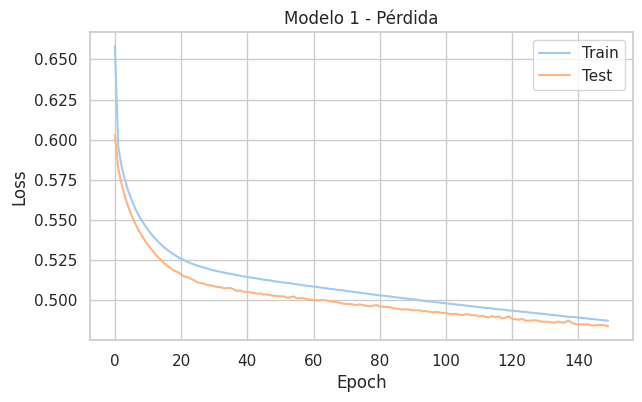


Modelo 2 -> Units: 8, Hidden: 2, Activation: elu, LR: 0.001, Opt: RMSprop, Batch: 16
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy train: 0.763, test: 0.766
Recall train: 0.876, test: 0.878
Precision train: 0.715, test: 0.717


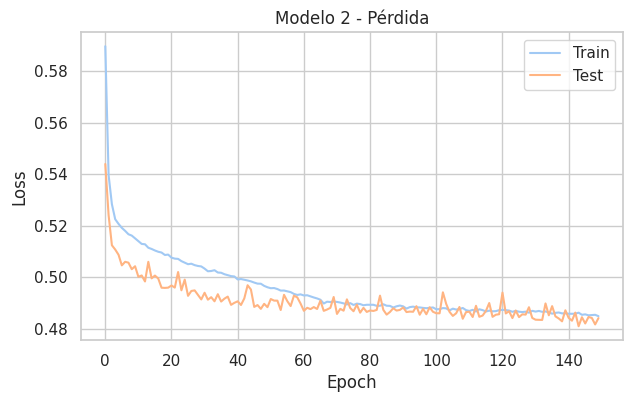


Modelo 3 -> Units: 16, Hidden: 3, Activation: tanh, LR: 0.001, Opt: Adam, Batch: 64
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy train: 0.842, test: 0.833
Recall train: 0.922, test: 0.910
Precision train: 0.795, test: 0.788


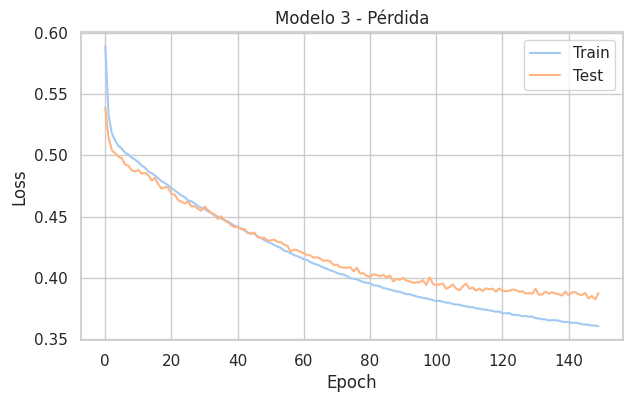


Modelo 4 -> Units: 16, Hidden: 3, Activation: elu, LR: 0.001, Opt: RMSprop, Batch: 64
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy train: 0.813, test: 0.810
Recall train: 0.860, test: 0.859
Precision train: 0.786, test: 0.782


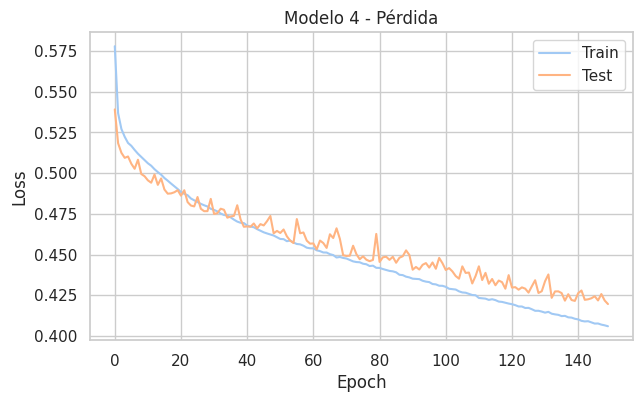


Modelo 5 -> Units: 8, Hidden: 1, Activation: tanh, LR: 0.0001, Opt: RMSprop, Batch: 16
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy train: 0.751, test: 0.760
Recall train: 0.830, test: 0.838
Precision train: 0.717, test: 0.725


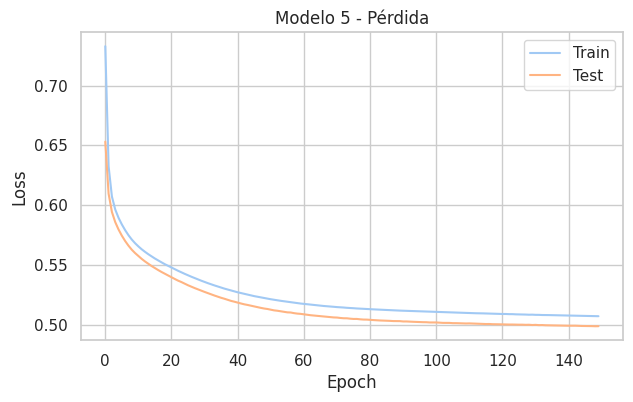


Modelo 6 -> Units: 32, Hidden: 3, Activation: selu, LR: 0.0001, Opt: RMSprop, Batch: 16
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy train: 0.812, test: 0.811
Recall train: 0.852, test: 0.848
Precision train: 0.789, test: 0.790


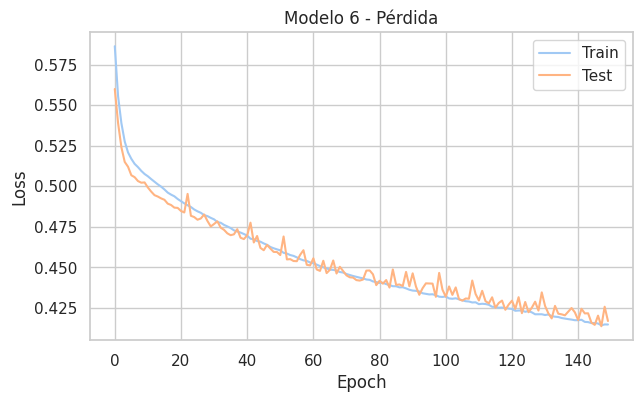


Modelo 7 -> Units: 16, Hidden: 3, Activation: tanh, LR: 0.001, Opt: RMSprop, Batch: 16
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy train: 0.855, test: 0.843
Recall train: 0.921, test: 0.908
Precision train: 0.814, test: 0.804


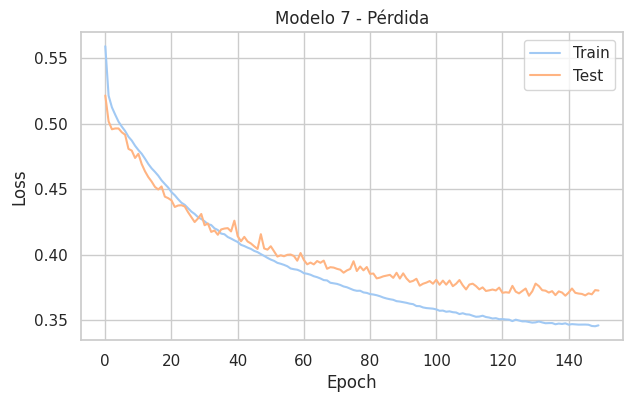


Modelo 8 -> Units: 64, Hidden: 3, Activation: selu, LR: 0.0001, Opt: RMSprop, Batch: 16
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy train: 0.835, test: 0.831
Recall train: 0.962, test: 0.959
Precision train: 0.767, test: 0.764


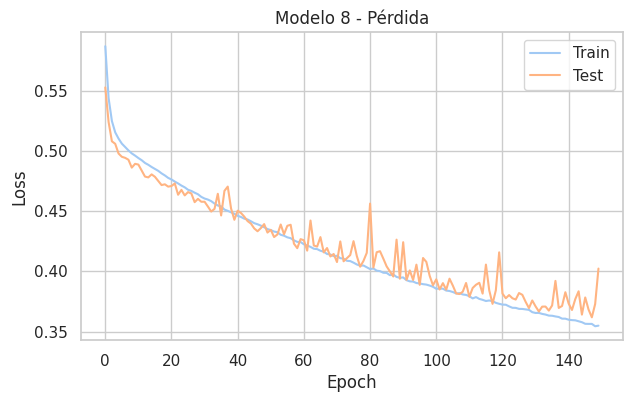


Modelo 9 -> Units: 32, Hidden: 3, Activation: relu, LR: 0.0001, Opt: RMSprop, Batch: 32
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy train: 0.838, test: 0.831
Recall train: 0.909, test: 0.904
Precision train: 0.796, test: 0.789


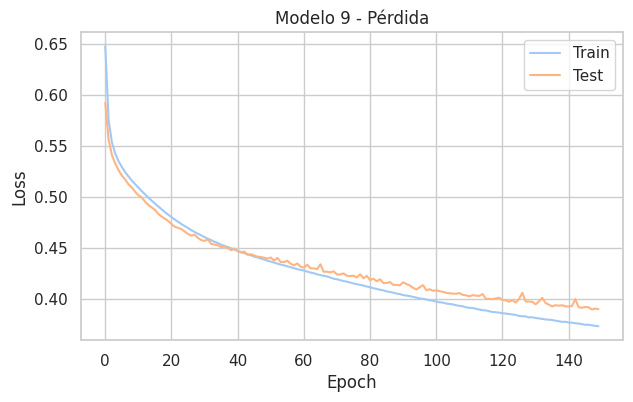


Modelo 10 -> Units: 64, Hidden: 1, Activation: tanh, LR: 0.001, Opt: RMSprop, Batch: 64
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy train: 0.823, test: 0.822
Recall train: 0.876, test: 0.871
Precision train: 0.792, test: 0.793


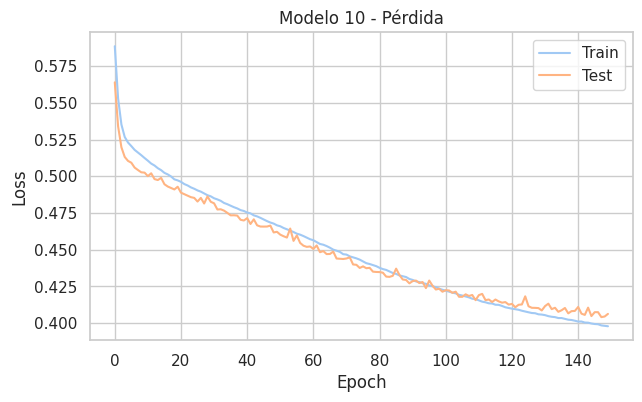

In [ ]:
cantidad_modelos = 10

for i in range(cantidad_modelos):

    # Hiperparámetros aleatorios
    units = np.random.choice([8, 16, 32, 64])
    n_hidden = np.random.choice([1, 2, 3])
    activation = np.random.choice(['relu', 'tanh', 'selu', 'elu'])
    learning_rate = np.random.choice([0.001, 0.0001])   # corregido
    batch_size = np.random.choice([16, 32, 64])
    opt_name = np.random.choice(['Adam', 'RMSprop'])

    print(f'\nModelo {i+1} -> Units: {units}, Hidden: {n_hidden}, Activation: {activation}, LR: {learning_rate}, Opt: {opt_name}, Batch: {batch_size}')

    # Crear modelo
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))

    for _ in range(n_hidden):
        model.add(Dense(units, activation=activation))

    model.add(Dense(1, activation="sigmoid"))  # corregido

    # Optimizer
    if opt_name == 'Adam':
        optimizer = optimizers.Adam(learning_rate=learning_rate)
    else:
        optimizer = optimizers.RMSprop(learning_rate=learning_rate)

    # Compilar
    model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    # Entrenar
    history = model.fit(
        X_train, y_train,
        epochs=150,            # probar con 200
        batch_size=batch_size,
        validation_data=(X_test, y_test),
        verbose=0
    )

    # Predicciones
    y_prob_train = model.predict(X_train)
    y_prob_test = model.predict(X_test)

    y_pred_train = (y_prob_train > 0.5).astype(int)
    y_pred_test = (y_prob_test > 0.5).astype(int)

    # Métricas
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    recall_train = recall_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)

    precision_train = precision_score(y_train, y_pred_train)
    precision_test = precision_score(y_test, y_pred_test)

    print(f'Accuracy train: {accuracy_train:.3f}, test: {accuracy_test:.3f}')
    print(f'Recall train: {recall_train:.3f}, test: {recall_test:.3f}')
    print(f'Precision train: {precision_train:.3f}, test: {precision_test:.3f}')

    # Graficar curva
    plt.figure(figsize=(7,4))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Modelo {i+1} - Pérdida')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["Train", "Test"])
    plt.show()

    # Guardar
    model.save(f"best_model_{i+1}.keras")


### **Analisis Undersampling**

Se prueban los mejores modelos obtenidos con los datos de oversampling, utilizando los datos undersampling.
Se busca probar el desempeño del modelo solo con los datos reales (sin datos generados).

Se crearán 7 modelos

MODELO 1/7
Hiperparámetros: capas=3, neuronas=32, activación=selu, lr=0.001, batch_size=32, optimizer=rmsprop


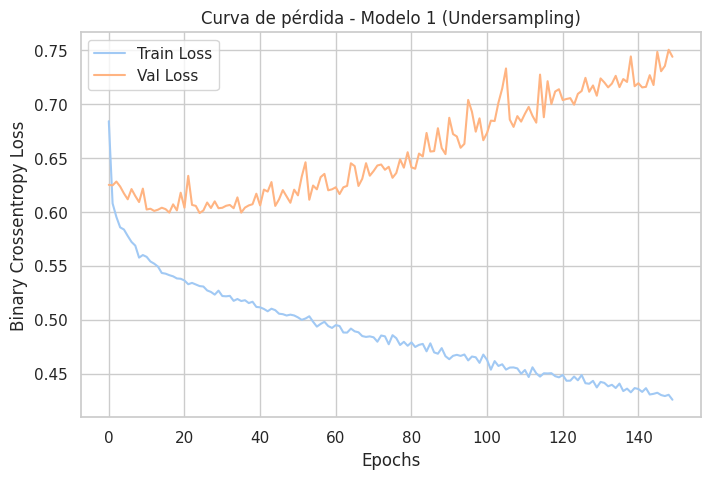


Modelo 1 - TRAIN:
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       668
           1       0.78      0.81      0.79       668

    accuracy                           0.79      1336
   macro avg       0.79      0.79      0.79      1336
weighted avg       0.79      0.79      0.79      1336

Modelo 1 - TEST:
              precision    recall  f1-score   support

           0       0.62      0.61      0.62       167
           1       0.62      0.63      0.62       167

    accuracy                           0.62       334
   macro avg       0.62      0.62      0.62       334
weighted avg       0.62      0.62      0.62       334


MODELO 2/7
Hiperparámetros: capas=2, neuronas=16, activación=relu, lr=0.001, batch_size=64, optimizer=rmsprop


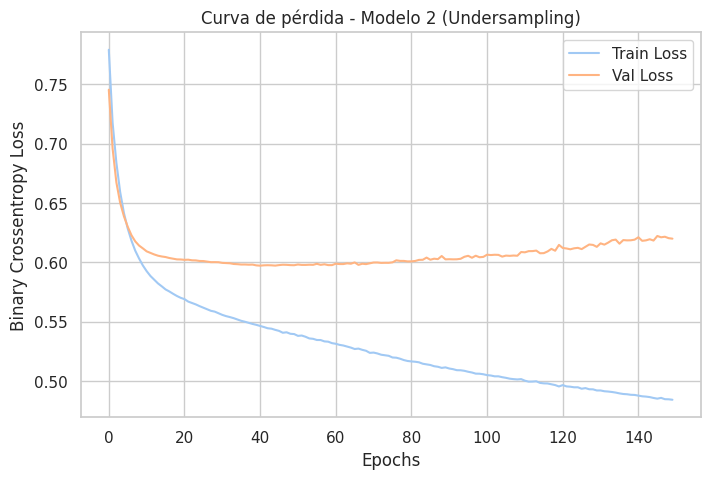


Modelo 2 - TRAIN:
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       668
           1       0.74      0.83      0.78       668

    accuracy                           0.77      1336
   macro avg       0.77      0.77      0.77      1336
weighted avg       0.77      0.77      0.77      1336

Modelo 2 - TEST:
              precision    recall  f1-score   support

           0       0.70      0.66      0.68       167
           1       0.68      0.72      0.70       167

    accuracy                           0.69       334
   macro avg       0.69      0.69      0.69       334
weighted avg       0.69      0.69      0.69       334


MODELO 3/7
Hiperparámetros: capas=2, neuronas=16, activación=elu, lr=0.001, batch_size=64, optimizer=adam


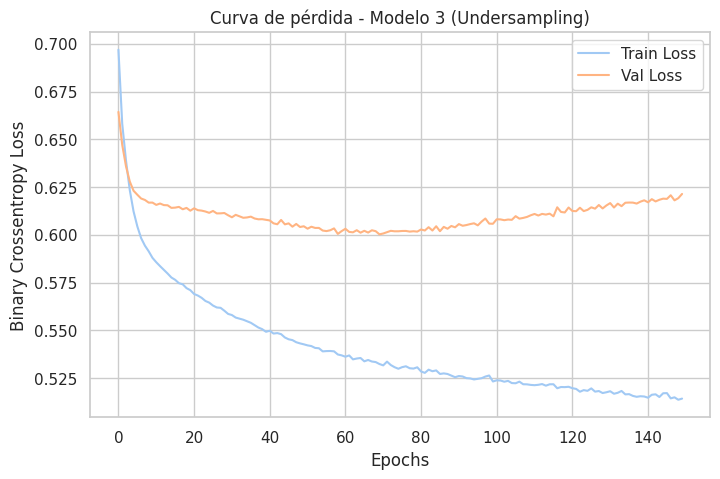


Modelo 3 - TRAIN:
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       668
           1       0.72      0.79      0.76       668

    accuracy                           0.74      1336
   macro avg       0.75      0.74      0.74      1336
weighted avg       0.75      0.74      0.74      1336

Modelo 3 - TEST:
              precision    recall  f1-score   support

           0       0.70      0.65      0.67       167
           1       0.67      0.72      0.70       167

    accuracy                           0.69       334
   macro avg       0.69      0.69      0.69       334
weighted avg       0.69      0.69      0.69       334


MODELO 4/7
Hiperparámetros: capas=1, neuronas=16, activación=tanh, lr=0.001, batch_size=32, optimizer=adam


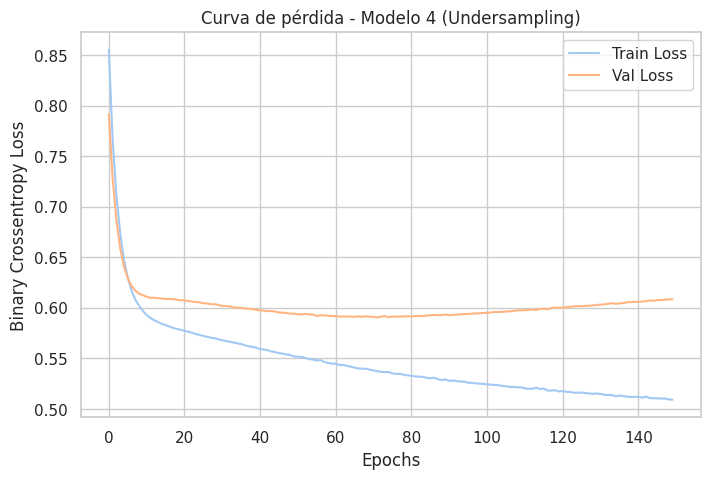


Modelo 4 - TRAIN:
              precision    recall  f1-score   support

           0       0.78      0.70      0.74       668
           1       0.73      0.80      0.76       668

    accuracy                           0.75      1336
   macro avg       0.75      0.75      0.75      1336
weighted avg       0.75      0.75      0.75      1336

Modelo 4 - TEST:
              precision    recall  f1-score   support

           0       0.71      0.64      0.67       167
           1       0.67      0.74      0.70       167

    accuracy                           0.69       334
   macro avg       0.69      0.69      0.69       334
weighted avg       0.69      0.69      0.69       334


MODELO 5/7
Hiperparámetros: capas=1, neuronas=8, activación=relu, lr=0.001, batch_size=16, optimizer=rmsprop


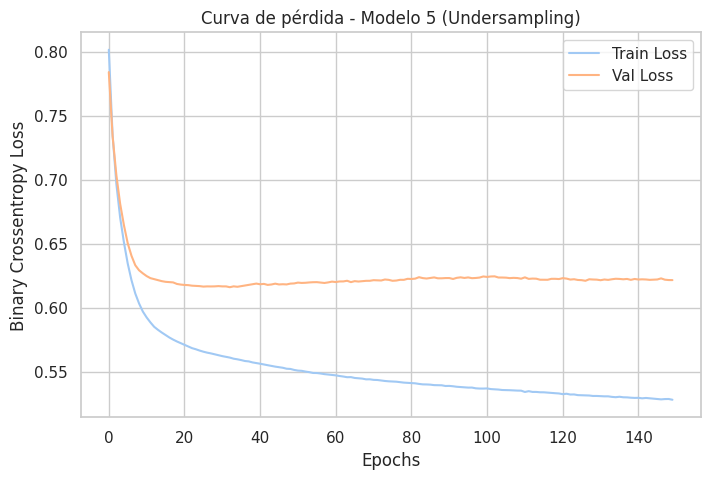


Modelo 5 - TRAIN:
              precision    recall  f1-score   support

           0       0.76      0.69      0.72       668
           1       0.72      0.78      0.75       668

    accuracy                           0.74      1336
   macro avg       0.74      0.74      0.73      1336
weighted avg       0.74      0.74      0.73      1336

Modelo 5 - TEST:
              precision    recall  f1-score   support

           0       0.71      0.67      0.69       167
           1       0.69      0.72      0.71       167

    accuracy                           0.70       334
   macro avg       0.70      0.70      0.70       334
weighted avg       0.70      0.70      0.70       334


MODELO 6/7
Hiperparámetros: capas=1, neuronas=64, activación=selu, lr=0.001, batch_size=32, optimizer=rmsprop


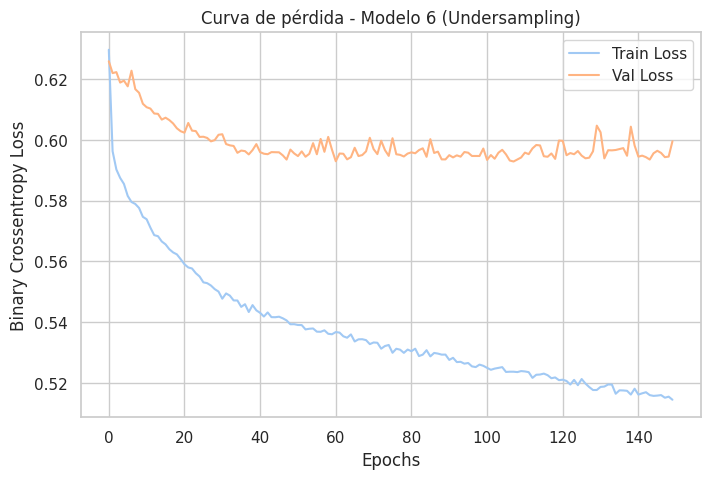


Modelo 6 - TRAIN:
              precision    recall  f1-score   support

           0       0.73      0.76      0.75       668
           1       0.75      0.72      0.74       668

    accuracy                           0.74      1336
   macro avg       0.74      0.74      0.74      1336
weighted avg       0.74      0.74      0.74      1336

Modelo 6 - TEST:
              precision    recall  f1-score   support

           0       0.68      0.71      0.70       167
           1       0.70      0.67      0.69       167

    accuracy                           0.69       334
   macro avg       0.69      0.69      0.69       334
weighted avg       0.69      0.69      0.69       334


MODELO 7/7
Hiperparámetros: capas=2, neuronas=16, activación=tanh, lr=0.0001, batch_size=32, optimizer=adam


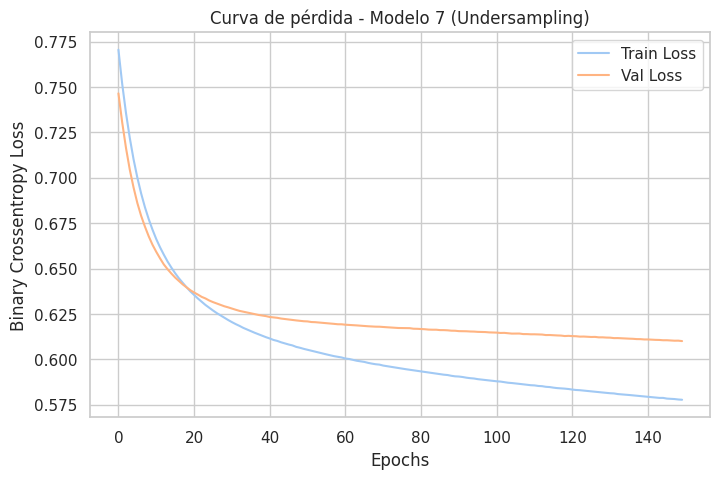


Modelo 7 - TRAIN:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       668
           1       0.68      0.73      0.70       668

    accuracy                           0.69      1336
   macro avg       0.69      0.69      0.69      1336
weighted avg       0.69      0.69      0.69      1336

Modelo 7 - TEST:
              precision    recall  f1-score   support

           0       0.71      0.60      0.65       167
           1       0.65      0.75      0.70       167

    accuracy                           0.68       334
   macro avg       0.68      0.68      0.67       334
weighted avg       0.68      0.68      0.67       334


Proceso completado. Se evaluaron 7 modelos.


In [ ]:
# Diccionario de hiperparámetros (ejemplo - tú lo modificarás)
hyperparams_dict = {
    'num_layers': [3, 2, 2, 1, 1, 1, 2],
    'neurons_per_layer': [32, 16, 16, 16, 8, 64, 16],
    'activation': ['selu', 'relu', 'elu', 'tanh', 'relu', 'selu', 'tanh'],
    'learning_rate': [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.0001],
    'batch_size': [32, 64, 64, 32, 16, 32, 32],
    'optimizer': ['rmsprop', 'rmsprop', 'adam', 'adam', 'rmsprop', 'rmsprop', 'adam']
}

# Verificar que todas las listas tengan la misma longitud
list_lengths = [len(v) for v in hyperparams_dict.values()]
if len(set(list_lengths)) != 1:
    raise ValueError("Todas las listas en el diccionario deben tener la misma longitud")

num_models = list_lengths[0]
print(f"Se crearán {num_models} modelos")

# Automatización del proceso
for i in range(num_models):
    print(f"\n{'='*60}")
    print(f"MODELO {i+1}/{num_models}")
    print(f"{'='*60}")

    # Tomar el i-ésimo valor de cada lista
    num_layers = hyperparams_dict['num_layers'][i]
    neurons = hyperparams_dict['neurons_per_layer'][i]
    activation = hyperparams_dict['activation'][i]
    lr = hyperparams_dict['learning_rate'][i]
    batch_size = hyperparams_dict['batch_size'][i]
    optimizer_name = hyperparams_dict['optimizer'][i]

    print(f"Hiperparámetros: capas={num_layers}, neuronas={neurons}, "
          f"activación={activation}, lr={lr}, batch_size={batch_size}, optimizer={optimizer_name}")

    # Crear modelo sin función
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train_under.shape[1],)))

    # Agregar capas ocultas
    for _ in range(num_layers):
        model.add(layers.Dense(neurons, activation=activation))

    # Capa de salida
    model.add(layers.Dense(1, activation='sigmoid'))

    # Configurar optimizador según el nombre
    if optimizer_name == 'rmsprop':
        optimizer = optimizers.RMSprop(learning_rate=lr)
    elif optimizer_name == 'adam':
        optimizer = optimizers.Adam(learning_rate=lr)
    elif optimizer_name == 'nadam':
        optimizer = optimizers.Nadam(learning_rate=lr)
    else:
        optimizer = optimizers.RMSprop(learning_rate=lr)  # Por defecto

    # Compilar modelo
    model.compile(
        optimizer=optimizer,
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

    # Entrenar modelo
    history = model.fit(
        X_train_under,
        y_train_under,
        epochs=150,
        batch_size=batch_size,
        validation_data=(X_test_under, y_test_under),
        verbose=0
    )

    # Gráfica de pérdida
    plt.figure(figsize=(8, 5))
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Val Loss")
    plt.title(f"Curva de pérdida - Modelo {i+1} (Undersampling)")
    plt.xlabel("Epochs")
    plt.ylabel("Binary Crossentropy Loss")
    plt.legend()
    plt.show()

    # Evaluación train
    y_pred_train_under = (model.predict(X_train_under, verbose=0) > 0.5).astype("int32")
    print(f"\nModelo {i+1} - TRAIN:")
    print(classification_report(y_train_under, y_pred_train_under))

    # Evaluación test
    y_pred_test_under = (model.predict(X_test_under, verbose=0) > 0.5).astype("int32")
    print(f"Modelo {i+1} - TEST:")
    print(classification_report(y_test_under, y_pred_test_under))
    model.save(f"Modelo_under_{i+1}.keras")

print(f"\nProceso completado. Se evaluaron {num_models} modelos.")

### Generar datos para validaciòn.

In [ ]:
# Configurar semilla para reproducibilidad
np.random.seed(42)

# Número de muestras a generar
n_muestras = 100  # Puedes ajustar este número

# Listas para almacenar los datos
datos = {
    'Edad': [],
    'ScoreCrediticio': [],
    'PorcentajeFinanciacion': [],
    'Plazo': [],
    'IngresoEstimado': [],
    'Gastos': [],
    'CapacidadDePago': [],
    'ValorCuotaMensual': [],
    'Perfil_INDEPENDIENTE': [],
    'Estado_USADO': [],
    'Genero_MASCULINO': [],
    'M3_30AC': []
}

# Generar datos aleatorios para cada columna
for i in range(n_muestras):
    # Edad entre 18 y 75
    datos['Edad'].append(np.random.randint(18, 76))

    # ScoreCrediticio entre 300 y 1000
    datos['ScoreCrediticio'].append(np.random.randint(300, 1001))

    # PorcentajeFinanciacion entre 0.1 y 2
    datos['PorcentajeFinanciacion'].append(round(np.random.uniform(0.1, 2.0), 2))

    # Plazo entre 8 y 90
    datos['Plazo'].append(np.random.randint(8, 91))

    # IngresoEstimado entre 0 y 35,000,000
    datos['IngresoEstimado'].append(np.random.uniform(0, 35000000))

    # Gastos entre 100,000 y 15,000,000
    datos['Gastos'].append(np.random.uniform(100000, 15000000))

    # CapacidadDePago entre 0 y 100
    datos['CapacidadDePago'].append(round(np.random.uniform(0, 100), 2))

    # ValorCuotaMensual entre 100,000 y 20,000,000
    datos['ValorCuotaMensual'].append(np.random.uniform(100000, 20000000))

    # Variables binarias (0 o 1)
    datos['Perfil_INDEPENDIENTE'].append(np.random.randint(0, 2))
    datos['Estado_USADO'].append(np.random.randint(0, 2))
    datos['Genero_MASCULINO'].append(np.random.randint(0, 2))
    datos['M3_30AC'].append(np.random.randint(0, 2))

# Crear DataFrame
df_validacion = pd.DataFrame(datos)

# Mostrar información del DataFrame
print("DataFrame de validación creado:")
print(f"Dimensiones: {df_validacion.shape}")
print("\nPrimeras 5 filas:")
df_validacion.head()


DataFrame de validación creado:
Dimensiones: (100, 12)

Primeras 5 filas:


,Edad,ScoreCrediticio,PorcentajeFinanciacion,Plazo,IngresoEstimado,Gastos,CapacidadDePago,ValorCuotaMensual,Perfil_INDEPENDIENTE,Estado_USADO,Genero_MASCULINO,M3_30AC
0,56,735,1.91,79,2.095305e+07,2.424678e+06,15.60,1.255864e+06,1,0,1,1
1,41,430,0.14,9,2.526996e+07,1.408444e+07,0.08,1.984501e+07,0,1,1,1
2,61,860,1.10,49,1.633298e+06,1.460896e+07,23.28,1.903068e+06,1,0,1,0
3,69,804,0.19,58,2.381076e+07,6.812439e+06,1.33,1.884981e+07,1,1,1,0
4,43,864,0.54,67,4.271338e+06,7.478136e+06,3.44,1.819548e+07,1,1,1,1


#### Esclamiento de datos generados




In [ ]:
df_validacion_scaled = df_validacion.copy()
df_validacion_scaled[numeric_vars] = scaler.transform(df_validacion_scaled[numeric_vars])

X_validacion = df_validacion_scaled.drop('M3_30AC', axis=1)
y_validacion = df_validacion_scaled['M3_30AC']

print("DataFrame de validación escalado y dividido:")
print(f"X_validacion shape: {X_validacion.shape}")
print(f"y_validacion shape: {y_validacion.shape}")
print("Primeras 5 filas de X_validacion:")
X_validacion.head()

DataFrame de validación escalado y dividido:
X_validacion shape: (100, 11)
y_validacion shape: (100,)
Primeras 5 filas de X_validacion:


,Edad,ScoreCrediticio,PorcentajeFinanciacion,Plazo,IngresoEstimado,Gastos,CapacidadDePago,ValorCuotaMensual,Perfil_INDEPENDIENTE,Estado_USADO,Genero_MASCULINO
0,1.021154,-0.322742,1.91,1.530795,2.927610,0.070592,3.156708,-0.626691,1,0,1
1,-0.165023,-3.885250,0.14,-4.855028,3.691392,5.261883,-0.297207,18.012517,0,1,1
2,1.416547,1.137303,1.10,-1.205986,-0.490596,5.495417,4.865862,0.022256,1,0,1
3,2.049175,0.483203,0.19,-0.384952,3.433220,2.024161,-0.019025,17.014642,1,1,1
4,-0.006866,1.184025,0.54,0.436082,-0.023853,2.320551,0.450547,16.358541,1,1,1


### Prueba del mejor modelo con datos generados

In [ ]:
# Cargar el modelo 'model_under_4.keras'
loaded_model = keras.models.load_model('Modelo_under_4.keras')

# Realizar predicciones en los datos de validación
y_pred_validacion_prob = loaded_model.predict(X_validacion, verbose=0)
y_pred_validacion = (y_pred_validacion_prob > 0.5).astype("int32")

# Imprimir el classification report
print("Classification Report para el modelo Modelo_under_4.keras con datos de validación:")
print(classification_report(y_validacion, y_pred_validacion))

Classification Report para el modelo Modelo_under_4.keras con datos de validación:
              precision    recall  f1-score   support

           0       0.35      0.14      0.20        43
           1       0.55      0.81      0.66        57

    accuracy                           0.52       100
   macro avg       0.45      0.47      0.43       100
weighted avg       0.47      0.52      0.46       100



Los datos generados aleatoriamente no siguen un comportamiento relacionado con la variable objetivo, por tla razònesta no es una buena manera de validar.

Sugerencias:

En un futuro, se pueden probar datos sinteticos generados por un oversampling para ambas clases.